In [109]:
import pandas as pd
import os
import re

In [110]:
def load_csv(file_path):
    # Load the CSV file and replace NaN with 'N/A'
    return pd.read_csv(file_path).fillna('N/A')

# REMEMBER TO CHANGE PATH

In [111]:
input_file_vietnamwork = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\raw\\merged_file_raw\\merged_file_raw_vietnamworks.csv'
output_file_vietnamwork = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\12-2024\\12_2024_processed_vietnamworks.csv'

input_file_carrerviet = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\raw\\merged_file_raw\\merged_file_raw_careerviet.csv'
output_file_carrerviet = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\12-2024\\12_2024_processed_carrerviet.csv.csv'

merged_file = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv'

#**Remove chinese row and change 'Source Platform' column's value to 'Vietnamworks' and also change column name**

In [112]:
def contains_chinese(text):
    if pd.isnull(text):  # Handle NaN values
        return False
    # Match any character in the range of Chinese Unicode blocks
    return bool(re.search(r'[\u4e00-\u9fff]', text))

def process_vietnamworks_data(input_file, output_file):
    # Load the CSV file
    df = pd.read_csv(input_file)

    # Update the 'Source Platform' column to 'Vietnamworks'
    df['Source Platform'] = 'Vietnamworks'

    #remove chinese row
    df = df[~df.apply(lambda row: row.astype(str).apply(contains_chinese).any(), axis=1)]

    #change the column name for convenience
    df.rename(columns={'year_of_experiences': 'Years of Experience'}, inplace=True)

    # Save the updated DataFrame to a new CSV file
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    df.to_csv(output_file, index=False)
    print(f"Vietnamworks data processed successfully and saved to '{output_file}'.")

# Process the Vietnamworks data
process_vietnamworks_data(input_file_vietnamwork, output_file_vietnamwork)

Vietnamworks data processed successfully and saved to 'D:\Work\Projects\Intro2DS-ITJobTrendAnalysis\data\processed\12-2024\12_2024_processed_vietnamworks.csv'.


#**Remove column Job link**

In [113]:
carrerviet_df = pd.read_csv(input_file_carrerviet)
carrerviet_df.drop(columns=['Job Link'], inplace=True)

carrerviet_df.to_csv(output_file_carrerviet, index=False)
print(f"Vietnamworks data processed successfully and saved to '{output_file_carrerviet}'.")

Vietnamworks data processed successfully and saved to 'D:\Work\Projects\Intro2DS-ITJobTrendAnalysis\data\processed\12-2024\12_2024_processed_carrerviet.csv.csv'.


#**Proccess column Years of Experience**

In [114]:
def clean_experience(text):
    if pd.isnull(text) or str(text).strip() == "":  # Handle NaN or empty strings
        return "N/A"

    # Use regex to match ranges (e.g., 4 - 5, 4-5) or single numbers (e.g., 3)
    match = re.search(r'\b\d+\s*-\s*\d+\b|\b\d+\b', str(text))
    if match:
        # Remove spaces around the hyphen in ranges for consistency (e.g., "4 - 6" -> "4-6")
        return match.group(0).replace(" ", "")
    return "N/A"  # Return 'N/A' if no match is found

#Carrer Viet
carrerviet_df = pd.read_csv(output_file_carrerviet) #Started using output_file
carrerviet_df['Years of Experience'] = carrerviet_df['Years of Experience'].apply(clean_experience)
carrerviet_df.to_csv(output_file_carrerviet, index=False)
print(f"Carrer Viet data processed successfully and saved to '{output_file_carrerviet}'.")

#Vietnamworks
vietnamwork_df = pd.read_csv(output_file_vietnamwork) #Started using output_file
vietnamwork_df['Years of Experience'] = vietnamwork_df['Years of Experience'].apply(clean_experience)
vietnamwork_df.to_csv(output_file_vietnamwork, index=False)
print(f"Vietnamworks data processed successfully and saved to '{output_file_vietnamwork}'.")

Carrer Viet data processed successfully and saved to 'D:\Work\Projects\Intro2DS-ITJobTrendAnalysis\data\processed\12-2024\12_2024_processed_carrerviet.csv.csv'.
Vietnamworks data processed successfully and saved to 'D:\Work\Projects\Intro2DS-ITJobTrendAnalysis\data\processed\12-2024\12_2024_processed_vietnamworks.csv'.


#**Proccess location column - For VietnamWork**

### Implementing the solution

In [115]:
cities = [
    "Hà Nội", "Hanoi", "Hồ Chí Minh", "Ho Chi Minh", "HCM",
    "Đà Nẵng", "Hải Phòng", "Cần Thơ", "Huế",
    "Nha Trang", "Vũng Tàu", "Đà Lạt", "Biên Hòa",
    "Buôn Ma Thuột", "Quy Nhơn", "Phan Thiết",
    "Hạ Long", "Thái Nguyên", "Nam Định", "Vinh",
    "Pleiku", "Mỹ Tho", "Rạch Giá", "Cà Mau", "Bạc Liêu", "Thành phố Hồ Chí Minh",
    "TP.HCM", "Ho Chi Minh City", "HCMC", "Bình Dương",  "TP Hồ Chí Minh", "Bac Ninh Province",
    "Bắc Ninh", "Vung Tau", "Hung Yen", "TP HẢI DƯƠNG", "Australia", "Dong Nai Province",
    "Đồng Nai", "Hai Duong Province", "Quốc gia Mozambique", "Taiwan", "Da Nang City",
    "Thu Duc city", "Thai Nguyen Province",
]

# Function to extract cities from an address, case-insensitive
def extract_cities(address, city_list):
    if not isinstance(address, str):  # Check if the address is a string
        return []  # Return an empty list if not a string
    # Convert the address to lowercase
    address = address.lower()
    # Convert the city list to lowercase
    city_list_lower = [city.lower() for city in city_list]
    # Create a regex pattern to match any city in the list
    pattern = r'\b(?:' + '|'.join(re.escape(city) for city in city_list_lower) + r')\b'
    # Find all matches in the address string
    return re.findall(pattern, address)

### Testing

In [116]:
new_df = vietnamwork_df.copy()

# Modify the copy: Extract cities and save in the new DataFrame, replace empty or null data with 'N/A'
new_df['Location'] = new_df['Location'].apply(
    lambda x: ", ".join(extract_cities(x, cities)) if isinstance(x, str) and x.strip() != "" else "N/A"
)

#I'm gonna assume those company is in "Hồ Chí Minh" because they don't have the city name in the location
new_df['Location'] = new_df['Location'].apply(
    lambda x: "Hồ Chí Minh" if x == "" else x
)

pd.set_option('display.max_rows', None)
print(new_df['Location'])

0                                    hcm, hanoi
1                                      hung yen
2                                           N/A
3                         thành phố hồ chí minh
4                                        hà nội
5                                        hà nội
6                                        hà nội
7                                         hanoi
8                                   ho chi minh
9                                           N/A
10                                 tp hải dương
11                                  hanoi, hcmc
12                            dong nai province
13                                          N/A
14                                  Hồ Chí Minh
15                                          hcm
16                                       hà nội
17                                          N/A
18                                          hcm
19                                     vung tau
20                                      

### Save to file if the data is good now

In [117]:
vietnamwork_df['Location'] = new_df['Location']
vietnamwork_df.to_csv(output_file_vietnamwork, index=False)

### Change location name

In [118]:
# Mapping of city name variations to the standard names
city_mapping = {
    "TP.HCM": "Hồ Chí Minh", "HCMC": "Hồ Chí Minh", "Ho Chi Minh": "Hồ Chí Minh",
    "Ho Chi Minh City": "Hồ Chí Minh", "HCM": "Hồ Chí Minh", "Thành phố Hồ Chí Minh": "Hồ Chí Minh",
    "TP Hồ Chí Minh": "Hồ Chí Minh", "Hồ Chí Minh": "Hồ Chí Minh",
    "Bac Ninh Province": "Bắc Ninh", "Bắc Ninh": "Bắc Ninh",
    "Vung Tau": "Vũng Tàu", "Vũng Tàu": "Vũng Tàu",
    "Da Nang City": "Đà Nẵng", "Đà Nẵng": "Đà Nẵng", "Đà Lạt": "Đà Lạt",
    "TP.HCM": "Hồ Chí Minh", "Dong Nai Province": "Đồng Nai", "Đồng Nai": "Đồng Nai",
    "Hai Duong Province": "Hải Dương", "Hải Dương": "Hải Dương", "Thái Nguyên": "Thái Nguyên",
    "Vinh": "Vinh", "Bình Dương": "Bình Dương", "Hạ Long": "Hạ Long",
    "Mỹ Tho": "Mỹ Tho", "Thành phố Hồ Chí Minh": "Hồ Chí Minh",
    "Quy Nhơn": "Quy Nhơn", "Biên Hòa": "Biên Hòa", "Buôn Ma Thuột": "Buôn Ma Thuột",
    "Cần Thơ": "Cần Thơ", "Nha Trang": "Nha Trang", "Rạch Giá": "Rạch Giá",
    "Cà Mau": "Cà Mau", "Bạc Liêu": "Bạc Liêu", "Phan Thiết": "Phan Thiết",
    "Thái Nguyên": "Thái Nguyên", "Thu Duc city": "Thủ Đức", "Pleiku": "Pleiku",
    "Hải Phòng": "Hải Phòng", "Quốc gia Mozambique": "Mozambique", "Australia": "Australia",
    "Taiwan": "Taiwan", "hà nội" : "Hà Nội", "hanoi" : "Hà nội", "hung yen" : "Hưng yên",
    "tp hải dương" : "Hải Dương", "thủ đức": "Hồ Chí Minh", "thu duc": "Hồ Chí Minh", "thu duc city": "Hồ Chí Minh",
    "thai nguyen province" : "Thái Nguyên", "Hồ Chí MinhHà Nội": "Hồ Chí Minh, Hà Nội",
}

city_mapping_lower = {key.lower(): value for key, value in city_mapping.items()}

def standardize_city_name(location):
    locations = [city_mapping_lower.get(loc.strip().lower(), loc.strip()) for loc in location.split(',')]

    # Join back to a single string (to handle concatenated cities like "Hồ Chí MinhHà Nội")
    combined_location = ", ".join(locations)

    #Separate concatenated city names (e.g., "Hồ Chí MinhHà Nội" -> "Hồ Chí Minh, Hà Nội")
    for city in city_mapping_lower.values():
        combined_location = re.sub(f'({city})(?=[A-Za-z])', r'\1, ', combined_location)

    seen = set()
    unique_locations = [loc.strip() for loc in combined_location.split(',') if not (loc.strip() in seen or seen.add(loc.strip()))]

    return ", ".join(unique_locations)

In [119]:
new_df = vietnamwork_df.copy()

new_df['Location'] = new_df['Location'].apply(standardize_city_name)

# Save to data frame and then file
vietnamwork_df['Location'] = new_df['Location']
vietnamwork_df.to_csv(output_file_vietnamwork, index=False)

#**Proccess Salary column**

### Change "Cạnh tranh" to "Negotiable"

In [120]:
# Replace "Cạnh tranh" or "Thương lượng" with "Negotiable"
# Save the updated DataFrame to a CSV file
carrerviet_df['Salary Range'] = carrerviet_df['Salary Range'].apply(
    lambda x: 'Negotiable' if x.lower() in ['cạnh tranh', 'thương lượng'] else x
)
carrerviet_df.to_csv(output_file_carrerviet, index=False)

vietnamwork_df['Salary Range'] = vietnamwork_df['Salary Range'].apply(
    lambda x: 'Negotiable' if x.lower() in ['cạnh tranh', 'thương lượng'] else x
)
vietnamwork_df.to_csv(output_file_carrerviet, index=False)

### Handle Data

#### Extract data

In [121]:
def extract_salary_info(salary_string):
    """Extract salary information from a given string."""
    # Remove commas from numbers and clean extra spaces
    salary_string = re.sub(r'(\d),(\d)', r'\1\2', salary_string)
    salary_string = ' '.join(salary_string.split())

    # Initialize variables
    amount = None
    currency = None
    period = None

    # Define patterns
    currency_symbols = r'[$₫€¥]|VND'
    # Handle Vietnamese million (tr/Tr) in amounts, including space before 'VND'
    amount_pattern = r'(\d+(?:\.\d+)?(?:\s*[tT]r)?(?:\s*-\s*\d+(?:\.\d+)?(?:\s*[tT]r)?)?)'
    amount_match = re.search(amount_pattern, salary_string)

    # Extract amount
    amount_match = re.search(amount_pattern, salary_string, re.IGNORECASE)
    if amount_match:
        amount = amount_match.group(1).replace(' ', '')

    # Extract currency
    currency_match = re.search(currency_symbols, salary_string, re.IGNORECASE)
    if currency_match:
        currency = currency_match.group(0).upper()
        if currency == "V" or currency == "VND":  # if VND or potentially V -> convert to ₫
          currency = "₫"

    # Extract period (e.g., per month or year)
    period_pattern = r'(?:/|(?=\s))(month|year|tháng|năm)'
    period_match = re.search(period_pattern, salary_string.lower())
    if period_match:
        period_mapping = {
            'month': 'month',
            'tháng': 'month',
            'year': 'year',
            'năm': 'year'
        }
        period = period_mapping.get(period_match.group(1))

    return {
        "amount": amount,
        "currency": currency,
        "period": period
    }

#### Handle data

In [122]:
def convert_to_number(amount_str):
    """Convert string amount to number, handling Vietnamese 'tr' (million)"""
    if not amount_str:
        return None

    # Remove any spaces and standardize 'Tr' to 'tr'
    amount_str = amount_str.strip().replace('Tr', 'tr')

    # Handle ranges
    if '-' in amount_str:
        # Check if 'tr' appears after the range
        tr_multiplier = 1000000 if 'tr' in amount_str.lower() else 1

        # Split and clean the range, removing 'tr' if present
        start, end = amount_str.replace('tr', '').split('-')
        start = start.strip()
        end = end.strip()

        try:
            # Apply the tr multiplier to both numbers
            start_num = float(start) * tr_multiplier
            end_num = float(end) * tr_multiplier
            return [start_num, end_num]
        except ValueError:
            return None

    # Handle single values
    if 'tr' in amount_str:
        try:
            return float(amount_str.replace('tr', '')) * 1000000
        except ValueError:
            return None

    try:
        return float(amount_str)
    except ValueError:
        return None

def convert_to_usd(amount, currency, salary_str):
    """Convert amount to USD based on currency"""
    # Exchange rates (you may want to update these or use an API)
    rates = {
        '₫': 1/24500,  # VND to USD
        '€': 1.1,      # EUR to USD
        '$': 1,        # USD to USD
        '¥': 0.0065
    }

    # handle case $ 60tr-80tr /tháng where tr will be missing due to converting tr to number
    if currency in ['$'] and 'tr' in salary_str:
        amount = amount * rates.get('₫', 1)

    # If amount is in VND (₫) and less than 1 million, convert to millions first
    if currency in ['₫'] and amount < 1000000:
        amount = amount * 1000

    return amount * rates.get(currency, 1)


def convert_to_monthly(amount, period):
    """Convert amount to monthly"""
    if period == 'year':
        return amount / 12
    return amount

In [123]:
def extract_and_convert_salary(salary_string):
    print(salary_string)
    # First extract the components
    extracted = extract_salary_info(salary_string)

    if not extracted['amount']:
        return None

    # Modified to handle ranges
    if '-' in extracted['amount']:
        start_num, end_num = convert_to_number(extracted['amount'])

        # Convert both individually to USD if currency is specified
        if extracted['currency']:
            start_usd = convert_to_usd(start_num, extracted['currency'], extracted['amount'])
            end_usd = convert_to_usd(end_num, extracted['currency'], extracted['amount'])
        else:
            start_usd = start_num
            end_usd = end_num

        # Convert both individually to monthly if period is specified
        if extracted['period']:
            start_monthly = convert_to_monthly(start_usd, extracted['period'])
            end_monthly = convert_to_monthly(end_usd, extracted['period'])
        else:
            start_monthly = start_usd
            end_monthly = end_usd

        return f"{start_monthly:.2f}-{end_monthly:.2f}"


    # Handle non-range values
    amount_num = convert_to_number(extracted['amount'])
    if extracted['currency']:
        amount_usd = convert_to_usd(amount_num, extracted['currency'], extracted['amount'])
    else:
        amount_usd = amount_num

    if extracted['period']:
        amount_monthly = convert_to_monthly(amount_usd, extracted['period'])
    else:
        amount_monthly = amount_usd

    return f"{amount_monthly:.2f}"

In [124]:
#------------------------------------------------------------------------------------KEEPING THIS FOR CONVERTING TO OLDER VERSION-----------------------------------------------------------------------------

# # Convert amount to number
# amount_num = convert_to_number(extracted['amount'])

# # Convert to USD if currency is specified
# if extracted['currency']:
#     amount_usd = convert_to_usd(amount_num, extracted['currency'])
# else:
#     amount_usd = amount_num

# # Convert to monthly if period is specified
# if extracted['period']:
#     amount_monthly = convert_to_monthly(amount_usd, extracted['period'])
# else:
#     amount_monthly = amount_usd

# return amount_monthly

### Test

In [125]:
# Test cases
test_cases = [
    # "0.5₫/month"          # This should be treated as 0.5 million VND
    "40 Tr - 45 Tr VND",
    "40tr-45Tr VND",
    "40-45Tr VND",
    "40-45Tr VND/năm",
]
for test in test_cases:
    converted = extract_and_convert_salary(test)
    print(f"Input: {test}")
    print(f"Output (USD/month): ${converted}\n")

40 Tr - 45 Tr VND
Input: 40 Tr - 45 Tr VND
Output (USD/month): $1632.65-1836.73

40tr-45Tr VND
Input: 40tr-45Tr VND
Output (USD/month): $1632.65-1836.73

40-45Tr VND
Input: 40-45Tr VND
Output (USD/month): $1632.65-1836.73

40-45Tr VND/năm
Input: 40-45Tr VND/năm
Output (USD/month): $136.05-153.06



### Apply to dataframe

#### CarrerViet

In [126]:
# Apply to DataFrame
salary_df = carrerviet_df[['Salary Range']].copy()

# Create new column with converted values
salary_df['Salary_USD_Monthly'] = salary_df['Salary Range'].apply(extract_and_convert_salary)

# Keep original extracted values if needed
salary_df['Extracted Info'] = salary_df['Salary Range'].apply(extract_salary_info)
salary_df['Original_Amount'] = salary_df['Extracted Info'].apply(lambda x: x['amount'] if x else None)
salary_df['Original_Currency'] = salary_df['Extracted Info'].apply(lambda x: x['currency'] if x else None)
salary_df['Original_Period'] = salary_df['Extracted Info'].apply(lambda x: x['period'] if x else None)

# Drop the intermediate column
salary_df.drop(columns=['Extracted Info'], inplace=True)

20 Tr - 25 Tr VND
Lên đến 40 Tr VND
Negotiable
30 Tr - 50 Tr VND
Negotiable
Negotiable
Negotiable
15 Tr - 40 Tr VND
Negotiable
10 Tr - 25 Tr VND
Negotiable
1,000 - 1,500 USD
Negotiable
Negotiable
Negotiable
Negotiable
10 Tr - 16 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
20 Tr - 25 Tr VND
11 Tr - 14 Tr VND
800 - 1,000 USD
60 Tr - 80 Tr VND
15 Tr - 25 Tr VND
40 Tr - 50 Tr VND
Negotiable
18 Tr - 25 Tr VND
Negotiable
Negotiable
Negotiable
12 Tr - 14 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
18 Tr - 22 Tr VND
Negotiable
Negotiable
Negotiable
12 Tr - 25 Tr VND
13 Tr - 20 Tr VND
Negotiable
6 Tr - 8 Tr VND
1,000 - 1,800 USD
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
12 Tr - 15 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
15 Tr - 35 Tr VND
14 Tr - 24 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
12 Tr - 25 Tr VND
30 Tr - 50 Tr VND
20 Tr - 35 Tr VND
Negotiable
Negotiable
Negotiab

In [127]:
# Create a temporary series with converted values
converted_salaries = carrerviet_df['Salary Range'].apply(extract_and_convert_salary)

# Update only where converted values are not None
mask = converted_salaries.notna()
carrerviet_df.loc[mask, 'Salary Range'] = '$' + converted_salaries[mask].astype(str)

20 Tr - 25 Tr VND
Lên đến 40 Tr VND
Negotiable
30 Tr - 50 Tr VND
Negotiable
Negotiable
Negotiable
15 Tr - 40 Tr VND
Negotiable
10 Tr - 25 Tr VND
Negotiable
1,000 - 1,500 USD
Negotiable
Negotiable
Negotiable
Negotiable
10 Tr - 16 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
20 Tr - 25 Tr VND
11 Tr - 14 Tr VND
800 - 1,000 USD
60 Tr - 80 Tr VND
15 Tr - 25 Tr VND
40 Tr - 50 Tr VND
Negotiable
18 Tr - 25 Tr VND
Negotiable
Negotiable
Negotiable
12 Tr - 14 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
18 Tr - 22 Tr VND
Negotiable
Negotiable
Negotiable
12 Tr - 25 Tr VND
13 Tr - 20 Tr VND
Negotiable
6 Tr - 8 Tr VND
1,000 - 1,800 USD
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
12 Tr - 15 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
Negotiable
15 Tr - 35 Tr VND
14 Tr - 24 Tr VND
Negotiable
Negotiable
Negotiable
Negotiable
12 Tr - 25 Tr VND
30 Tr - 50 Tr VND
20 Tr - 35 Tr VND
Negotiable
Negotiable
Negotiab

#### VietnamWork

In [128]:
# Apply to DataFrame
salary_df = vietnamwork_df[['Salary Range']].copy()

# Create new column with converted values
salary_df['Salary_USD_Monthly'] = salary_df['Salary Range'].apply(extract_and_convert_salary)

# Keep original extracted values if needed
salary_df['Extracted Info'] = salary_df['Salary Range'].apply(extract_salary_info)
salary_df['Original_Amount'] = salary_df['Extracted Info'].apply(lambda x: x['amount'] if x else None)
salary_df['Original_Currency'] = salary_df['Extracted Info'].apply(lambda x: x['currency'] if x else None)
salary_df['Original_Period'] = salary_df['Extracted Info'].apply(lambda x: x['period'] if x else None)

# Drop the intermediate column
salary_df.drop(columns=['Extracted Info'], inplace=True)

Negotiable
$ 700-900 /tháng
Negotiable
Negotiable
Negotiable
Từ $ 10tr /tháng
Từ 15tr ₫/tháng
Negotiable
Negotiable
Negotiable
Negotiable
$ 2,000-3,000 /tháng
Negotiable
$ 2,000-4,000 /tháng
Negotiable
Negotiable
$ 1,000-2,200 /tháng
$ 900-1,200 /tháng
$ 1,700-3,000 /tháng
Negotiable
$ 1,200-1,400 /tháng
Negotiable
Từ 180tr ₫/năm
$ 650-800 /tháng
$ 1,000-1,500 /tháng
Negotiable
Negotiable
Negotiable
$ 1,000-2,000 /tháng
$ 900-1,500 /tháng
Negotiable
Negotiable
500-750 ₫/tháng
$ 700-2,000 /tháng
15tr-20tr ₫/tháng
6tr-10tr ₫/tháng
Negotiable
$ 800-1,200 /tháng
Negotiable
Tới $ 1,750 /tháng
Negotiable
Negotiable
Negotiable
$ 600-1,000 /tháng
$ 2,000-3,000 /tháng
Negotiable
Negotiable
Từ 14.5tr ₫/tháng
Negotiable
Negotiable
$ 1,000-1,500 /tháng
Negotiable
$ 800-1,500 /tháng
Negotiable
Negotiable
Negotiable
Negotiable
$ 800-1,500 /tháng
$ 1,000-2,000 /tháng
1,500-3,000 ₫/tháng
Negotiable
$ 1,500-2,000 /tháng
Negotiable
22tr-28tr ₫/tháng
Negotiable
Negotiable
Negotiable
$ 800-2,500 /tháng
Ne

In [129]:
# Create a temporary series with converted values
converted_salaries = vietnamwork_df['Salary Range'].apply(extract_and_convert_salary)

# Update only where converted values are not None
mask = converted_salaries.notna()
vietnamwork_df.loc[mask, 'Salary Range'] = '$' + converted_salaries[mask].astype(str)

Negotiable
$ 700-900 /tháng
Negotiable
Negotiable
Negotiable
Từ $ 10tr /tháng
Từ 15tr ₫/tháng
Negotiable
Negotiable
Negotiable
Negotiable
$ 2,000-3,000 /tháng
Negotiable
$ 2,000-4,000 /tháng
Negotiable
Negotiable
$ 1,000-2,200 /tháng
$ 900-1,200 /tháng
$ 1,700-3,000 /tháng
Negotiable
$ 1,200-1,400 /tháng
Negotiable
Từ 180tr ₫/năm
$ 650-800 /tháng
$ 1,000-1,500 /tháng
Negotiable
Negotiable
Negotiable
$ 1,000-2,000 /tháng
$ 900-1,500 /tháng
Negotiable
Negotiable
500-750 ₫/tháng
$ 700-2,000 /tháng
15tr-20tr ₫/tháng
6tr-10tr ₫/tháng
Negotiable
$ 800-1,200 /tháng
Negotiable
Tới $ 1,750 /tháng
Negotiable
Negotiable
Negotiable
$ 600-1,000 /tháng
$ 2,000-3,000 /tháng
Negotiable
Negotiable
Từ 14.5tr ₫/tháng
Negotiable
Negotiable
$ 1,000-1,500 /tháng
Negotiable
$ 800-1,500 /tháng
Negotiable
Negotiable
Negotiable
Negotiable
$ 800-1,500 /tháng
$ 1,000-2,000 /tháng
1,500-3,000 ₫/tháng
Negotiable
$ 1,500-2,000 /tháng
Negotiable
22tr-28tr ₫/tháng
Negotiable
Negotiable
Negotiable
$ 800-2,500 /tháng
Ne

### Save to file

In [130]:
carrerviet_df.to_csv(output_file_carrerviet, index=False)
vietnamwork_df.to_csv(output_file_vietnamwork, index=False)

#**Proccess role**

### Filter based on job title

In [131]:
# Function to check if a job title involves IT
def extract_it_role(job_title, keywords):
    if isinstance(job_title, str):  # Ensure it's a string
        job_title_lower = job_title.lower()
        # Check if any IT-related keyword is in the job title
        matching_keywords = [keyword for keyword in keywords if keyword.lower() in job_title_lower]
        if matching_keywords:
            return ", ".join(matching_keywords)  # Return the matching keywords or the job title
    return "N/A"  # Return N/A if no match is found

def standardize_it_role(job_title):
    if not isinstance(job_title, str):
        return "N/A"

    job_title_lower = job_title.lower()

    # Define role mapping patterns
    role_patterns = {
        "frontend developer": ["frontend", "front end", "front-end"],
        "backend developer": ["backend", "back end", "back-end"],
        "full stack developer": ["full stack", "full-stack", "fullstack"],
        "mobile developer": ["mobile", "ios", "android", "app developer"],
        "game developer": ["game", "gaming"],
        "software developer": ["software developer", "developer"],
        "web developer": ["web developer"],

        "software engineer": ["software engineer"],
        "systems engineer": ["system engineer", "systems engineer"],
        "cloud engineer": ["cloud engineer"],
        "DevOps engineer": ["devops"],
        "data engineer": ["data engineer"],
        "QA engineer": ["qa engineer", "quality assurance", "tester"],
        "security engineer": ["security engineer"],

        "solutions architect": ["solution architect", "solutions architect"],
        "system architect": ["system architect"],
        "software architect": ["software architect"],

        "business analyst": ["business analyst", "ba "],
        "data analyst": ["data analyst"],
        "systems analyst": ["system analyst", "systems analyst"],
        "data scientist": ["data scientist"],

        "product manager": ["product manager", "product owner"],
        "project manager": ["project manager", "project lead"],
        "tech lead": ["tech lead", "team lead", "technical lead"],

        "system administrator": ["system admin", "sysadmin", "system administrator"],
        "database administrator": ["dba", "database admin", "database administrator"],
        "network administrator": ["network admin", "network administrator"],

        "IT support": ["it support", "technical support", "helpdesk", "help desk"],
        "UX/UI designer": ["ux", "ui", "ux/ui", "user interface", "user experience"],
        "technical writer": ["technical writer", "documentation"],

        "scrum master": ["scrum master", "scrum"],
        "IT consultant": ["it consultant", "technical consultant"],
        "software consultant": ["software consultant"]
    }

    # Check for matches
    for standardized_role, patterns in role_patterns.items():
        if any(pattern in job_title_lower for pattern in patterns):
            return standardized_role

    # Check for general engineering/development roles
    if "engineer" in job_title_lower:
        return "software engineer"
    if "developer" in job_title_lower:
        return "software developer"

    # Check for general IT keywords
    general_it_keywords = ["it", "software", "tech", "digital", "computer"]
    if any(keyword in job_title_lower for keyword in general_it_keywords):
        return "IT professional"

    return "N/A"

### Filter based on skills

In [132]:
def determine_role_from_skills(skills, job_title=''):
    """
    Determines the IT role based on skills and optionally job title.

    Args:
        skills (str): Required skills text
        job_title (str, optional): Job title to provide additional context

    Returns:
        str: Determined role or 'N/A' if unable to classify
    """
    if not isinstance(skills, str):
        return "N/A"

    # Combine skills and job title for better context
    combined_text = f"{skills} {job_title}".lower()

    # Define expanded skill patterns for different roles
    skill_patterns = {
        "frontend developer": [
            # Core Frontend
            "javascript", "react", "angular", "vue", "html", "css", "frontend", "front-end",
            "jquery", "typescript", "web development", "ui/ux",
            # Additional Frontend
            "webpack", "babel", "sass", "less", "bootstrap", "material-ui", "tailwind",
            "responsive design", "spa", "pwa", "web components", "next.js", "nuxt",
            "redux", "vuex", "styled-components", "css-in-js", "webpack", "vite",
            "ember", "svelte", "web accessibility", "wcag"
        ],

        "backend developer": [
            # Core Backend
            "java", "python", "php", "node.js", "nodejs", ".net", "c#", "ruby", "backend",
            "spring", "django", "laravel", "api", "restful", "microservices",
            # Additional Backend
            "express.js", "fastapi", "flask", "symfony", "hibernate", "orm",
            "graphql", "grpc", "soap", "websocket", "redis", "memcached",
            "rabbitmq", "kafka", "celery", "oauth", "jwt", "asp.net",
            "nestjs", "gin", "fastapi", "vertx", "quarkus", "micronaut"
        ],

        "full stack developer": [
            # Full Stack Indicators
            "full stack", "fullstack", "full-stack", "mern", "mean",
            # Full Stack Technologies
            "node.js + react", "python + vue", "java + angular",
            "frontend + backend", "client + server", "lamp stack",
            "jamstack", "serverless", "netlify", "vercel", "heroku"
        ],

        "mobile developer": [
            # Mobile Development
            "android", "ios", "swift", "kotlin", "react native", "flutter", "mobile development",
            "xamarin", "ionic", "cordova", "objective-c", "android studio", "xcode",
            "mobile ui", "responsive design", "push notifications", "mobile security",
            "app store", "play store", "mobile analytics", "mobile testing",
            "arkit", "core ml", "watchos", "tvos", "widgets", "capacitor"
        ],

        "data engineer": [
            # Data Engineering
            "hadoop", "spark", "etl", "sql", "nosql", "data warehouse", "big data",
            "data pipeline", "kafka", "data engineering", "airflow", "nifi",
            "data modeling", "data lake", "data integration", "snowflake",
            "redshift", "databricks", "delta lake", "dbt", "informatica",
            "talend", "data quality", "data governance", "data catalog"
        ],

        "data analyst": [
            # Data Analysis
            "power bi", "tableau", "data analysis", "analytics", "statistical analysis",
            "data visualization", "excel", "data modeling", "looker", "qlik",
            "pandas", "numpy", "matplotlib", "seaborn", "plotly", "business intelligence",
            "sql reporting", "dashboards", "kpi", "metrics", "data mining",
            "ab testing", "cohort analysis", "forecasting", "reporting"
        ],

        "data scientist": [
            # Data Science
            "machine learning", "python", "r", "ai", "deep learning", "tensorflow",
            "pytorch", "scikit-learn", "statistics", "data science",
            "natural language processing", "computer vision", "neural networks",
            "reinforcement learning", "keras", "opencv", "spacy", "nltk",
            "predictive modeling", "clustering", "classification", "regression",
            "feature engineering", "model deployment", "mlops"
        ],

        "DevOps engineer": [
            # DevOps
            "aws", "azure", "gcp", "docker", "kubernetes", "jenkins", "ci/cd",
            "terraform", "ansible", "devops", "cloud", "gitlab", "github actions",
            "prometheus", "grafana", "elk stack", "logging", "monitoring",
            "infrastructure as code", "configuration management", "puppet", "chef",
            "helm", "istio", "service mesh", "argocd", "sonarqube", "nexus",
            "containerization", "orchestration", "cloud native"
        ],

        "cloud architect": [
            # Cloud Architecture
            "aws architect", "azure architect", "gcp architect", "cloud architecture",
            "cloud security", "cloud migration", "multi-cloud", "hybrid cloud",
            "serverless", "microservices architecture", "cloud optimization",
            "disaster recovery", "high availability", "scalability", "cloud cost"
        ],

        "QA engineer": [
            # Quality Assurance
            "testing", "selenium", "test automation", "quality assurance", "qa",
            "junit", "testng", "cypress", "cucumber", "jmeter", "postman",
            "test cases", "test plans", "manual testing", "automated testing",
            "performance testing", "load testing", "stress testing", "api testing",
            "regression testing", "integration testing", "end-to-end testing",
            "behavior driven development", "test driven development"
        ],

        "security engineer": [
            # Security
            "security", "cybersecurity", "penetration testing", "ethical hacking",
            "firewall", "encryption", "security+", "cissp", "ceh", "siem",
            "vulnerability assessment", "incident response", "security audit",
            "network security", "application security", "cloud security",
            "devsecops", "threat modeling", "security architecture",
            "identity management", "access control", "security compliance"
        ],

        "database administrator": [
            # Database Administration
            "sql server", "oracle", "mysql", "postgresql", "mongodb", "database administration",
            "dba", "database", "cassandra", "redis", "elasticsearch", "neo4j",
            "database tuning", "database security", "backup and recovery",
            "replication", "clustering", "high availability", "performance tuning",
            "database migration", "data modeling", "etl", "stored procedures"
        ],

        "system administrator": [
            # System Administration
            "linux", "windows server", "active directory", "system administration",
            "networking", "vmware", "virtualization", "powershell", "bash",
            "server management", "patch management", "backup", "disaster recovery",
            "monitoring", "troubleshooting", "system security", "ldap", "dns",
            "dhcp", "email server", "file server", "print server", "remote access"
        ],

        "SAP consultant": [
            # SAP
            "sap", "erp", "abap", "sap fico", "sap mm", "sap sd", "sap hana",
            "sap basis", "sap hr", "sap pp", "sap crm", "sap bi", "sap bw",
            "sap implementation", "sap integration", "sap security", "sap testing",
            "sap fiori", "sap business one", "sap s/4hana", "sap bapi",
            "sap workflow", "sap pi/po", "sap solution manager"
        ],

        "network engineer": [
            # Networking
            "cisco", "networking", "ccna", "ccnp", "network security", "routing",
            "switching", "vpn", "wan", "lan", "sdwan", "network automation",
            "network monitoring", "network protocols", "firewall", "load balancer",
            "dns", "dhcp", "ipv6", "bgp", "mpls", "qos", "network design",
            "juniper", "palo alto", "f5", "fortinet", "checkpoint"
        ],

        "business intelligence analyst": [
            # BI
            "business intelligence", "data warehousing", "etl", "reporting",
            "dashboards", "analytics", "sql", "power bi", "tableau", "qlik",
            "cognos", "ssrs", "ssis", "olap", "data modeling", "data visualization",
            "kpi", "metrics", "business analysis", "data quality", "data governance"
        ],

        "embedded systems engineer": [
            # Embedded Systems
            "embedded", "firmware", "rtos", "microcontroller", "arm", "iot",
            "embedded linux", "c", "c++", "assembly", "device drivers",
            "hardware interfaces", "sensors", "real-time systems", "plc",
            "embedded software", "arduino", "raspberry pi", "electronics"
        ],

        # New specialized roles
        "blockchain developer": [
            "blockchain", "smart contracts", "solidity", "ethereum", "web3", "crypto",
            "hyperledger", "defi", "nft", "consensus", "distributed ledger",
            "bitcoin", "cryptocurrency", "chain", "tokenization", "mining"
        ],

        "ai/ml engineer": [
            "artificial intelligence", "machine learning engineer", "ml engineer",
            "mlops", "model deployment", "model optimization", "feature store",
            "ml pipeline", "model monitoring", "model versioning", "experiment tracking",
            "model serving", "model governance", "ai platform", "ml platform"
        ]
    }

    # Weight multipliers for different matching types
    WEIGHT_EXACT = 2.0    # Exact matches
    WEIGHT_PARTIAL = 1.0  # Partial matches

    # Track weighted matching scores for each role
    role_scores = {role: 0 for role in skill_patterns.keys()}

    # Calculate weighted scores based on matching skills
    for role, patterns in skill_patterns.items():
        for pattern in patterns:
            # Check for exact matches (with word boundaries)
            if f" {pattern} " in f" {combined_text} ":
                role_scores[role] += WEIGHT_EXACT
            # Check for partial matches
            elif pattern in combined_text:
                role_scores[role] += WEIGHT_PARTIAL

    # Get the role with highest score
    max_score = max(role_scores.values())
    if max_score > 0:
        # Get all roles with the max score
        best_roles = [role for role, score in role_scores.items() if score == max_score]

        # If multiple roles have the same score, use job title as tiebreaker if available
        if len(best_roles) > 1 and job_title:
            for role in best_roles:
                if role.lower().replace(" ", "") in job_title.lower().replace(" ", ""):
                    return role
        return best_roles[0]  # Return the first best match if no tiebreaker

    # Detect hybrid roles
    hybrid_threshold = max_score * 0.8  # 80% of max score
    potential_hybrid_roles = [role for role, score in role_scores.items()
                            if score >= hybrid_threshold]
    if len(potential_hybrid_roles) > 1:
        # Check for common hybrid combinations
        if ("frontend developer" in potential_hybrid_roles and
            "backend developer" in potential_hybrid_roles):
            return "full stack developer"
        if ("data scientist" in potential_hybrid_roles and
            "data engineer" in potential_hybrid_roles):
            return "machine learning engineer"

    # If no specific skills match but contains general programming keywords
    general_programming = [
        "code", "programming", "developer", "development", "software",
        "coding", "computer science", "engineering", "application"
    ]
    if any(keyword in combined_text for keyword in general_programming):
        return "software developer"

    # If contains general IT keywords
    general_it = [
        "it", "computer", "tech", "information technology", "system",
        "support", "helpdesk", "technical", "technology"
    ]
    if any(keyword in combined_text for keyword in general_it):
        return "IT professional"

    return "N/A"

# Example usage with the DataFrame
def update_roles_in_dataframe(df):
    """
    Updates the Role column in the DataFrame using both job title and skills.

    Args:
        df (pandas.DataFrame): DataFrame containing 'Job Title', 'Required Skills', and 'Role' columns

    Returns:
        pandas.DataFrame: Updated DataFrame with refined role classifications
    """
    new_df = df.copy()

    # First apply the job title based role mapping (assuming standardize_it_role exists)
    new_df['Role'] = new_df['Job Title'].apply(lambda x: standardize_it_role(x))

    # Then for rows where Role is "N/A", try to determine role from both skills and job title
    mask = new_df['Role'] == "N/A"
    new_df.loc[mask, 'Role'] = new_df.loc[mask].apply(
        lambda row: determine_role_from_skills(
            row['Required Skills'],
            row['Job Title']
        ),
        axis=1
    )

    return new_df

### For testing


#### Run this first
This will fill in Role based on title

In [133]:
# Apply the function to the dataframe
#carrerviet_df
#vietnamwork_df
new_df = vietnamwork_df.copy()
new_df['Role'] = new_df['Job Title'].apply(lambda x: standardize_it_role(x))

# Display the results
pd.set_option('display.max_rows', None)
print(new_df['Role'].value_counts())

Role
N/A                       404
IT professional           199
software engineer         128
software developer         78
business analyst           56
QA engineer                36
IT support                 33
full stack developer       31
UX/UI designer             29
backend developer          28
data analyst               26
mobile developer           23
project manager            21
product manager            20
frontend developer         17
data engineer              15
solutions architect        13
DevOps engineer            12
systems engineer           12
database administrator     12
tech lead                  11
security engineer          10
game developer              9
data scientist              7
system administrator        7
IT consultant               3
cloud engineer              2
network administrator       2
systems analyst             2
system architect            1
scrum master                1
software architect          1
Name: count, dtype: int64


#### Run this next
This will fill in Role based on skill

In [134]:
# Update your DataFrame
updated_df = update_roles_in_dataframe(new_df)

# View the results
print("Updated distribution of roles:")
print(updated_df['Role'].value_counts())

# Check remaining unmatched entries
unmatched = updated_df[updated_df['Role'] == 'N/A']
print(f"\nRemaining unmatched entries: {len(unmatched)}")

Updated distribution of roles:
Role
IT professional                  199
data scientist                   173
software engineer                128
software developer                78
backend developer                 71
business analyst                  56
QA engineer                       53
data analyst                      47
data engineer                     35
IT support                        33
SAP consultant                    32
full stack developer              31
UX/UI designer                    29
embedded systems engineer         28
frontend developer                27
mobile developer                  24
database administrator            24
DevOps engineer                   23
project manager                   21
product manager                   20
system administrator              18
business intelligence analyst     16
security engineer                 15
solutions architect               13
systems engineer                  12
tech lead                         11
ga

#### The rest are all null on "Required Skills" column

In [135]:
updated_df = updated_df[updated_df['Role'].notna() & (updated_df['Role'] != "")]

### Now for the real thing, run on both carrerviet_df and vietnamwork_df

### Carrer Viet

In [136]:
new_df = carrerviet_df.copy()
new_df['Role'] = new_df['Job Title'].apply(lambda x: standardize_it_role(x))

# Display the results
pd.set_option('display.max_rows', None)
print(new_df['Role'].value_counts())

Role
N/A                       949
IT professional           209
software engineer          88
business analyst           87
software developer         84
QA engineer                64
backend developer          38
data analyst               36
data engineer              35
DevOps engineer            33
IT support                 33
frontend developer         28
mobile developer           24
UX/UI designer             23
game developer             23
project manager            23
full stack developer       22
product manager            20
data scientist             18
system administrator       14
tech lead                  11
systems engineer            9
solutions architect         7
cloud engineer              7
network administrator       6
scrum master                4
systems analyst             3
database administrator      3
security engineer           3
Name: count, dtype: int64


In [137]:
updated_df = update_roles_in_dataframe(new_df)

# View the results
print("Updated distribution of roles:")
print(updated_df['Role'].value_counts())

# Check remaining unmatched entries
unmatched = updated_df[updated_df['Role'] == 'N/A']
print(f"\nRemaining unmatched entries: {len(unmatched)}")

Updated distribution of roles:
Role
N/A                              367
IT professional                  209
data analyst                     143
data scientist                   130
data engineer                    123
backend developer                122
software engineer                 88
business analyst                  87
software developer                84
QA engineer                       65
SAP consultant                    60
DevOps engineer                   58
frontend developer                51
system administrator              37
IT support                        33
mobile developer                  29
UX/UI designer                    23
game developer                    23
project manager                   23
full stack developer              22
business intelligence analyst     21
product manager                   20
security engineer                 17
database administrator            12
tech lead                         11
embedded systems engineer         10
sy

In [138]:
updated_df = updated_df[updated_df['Role'].notna() & (updated_df['Role'] != "")] #Delete "" row
carrerviet_df['Role'] = updated_df['Role'] #Update role column
carrerviet_df.to_csv(output_file_carrerviet, index=False) #Save to file

### VietNam Work


In [139]:
new_df = vietnamwork_df.copy()
new_df['Role'] = new_df['Job Title'].apply(lambda x: standardize_it_role(x))

# Display the results
pd.set_option('display.max_rows', None)
print(new_df['Role'].value_counts())

Role
N/A                       404
IT professional           199
software engineer         128
software developer         78
business analyst           56
QA engineer                36
IT support                 33
full stack developer       31
UX/UI designer             29
backend developer          28
data analyst               26
mobile developer           23
project manager            21
product manager            20
frontend developer         17
data engineer              15
solutions architect        13
DevOps engineer            12
systems engineer           12
database administrator     12
tech lead                  11
security engineer          10
game developer              9
data scientist              7
system administrator        7
IT consultant               3
cloud engineer              2
network administrator       2
systems analyst             2
system architect            1
scrum master                1
software architect          1
Name: count, dtype: int64


In [140]:
updated_df = update_roles_in_dataframe(new_df)

# View the results
print("Updated distribution of roles:")
print(updated_df['Role'].value_counts())

# Check remaining unmatched entries
unmatched = updated_df[updated_df['Role'] == 'N/A']
print(f"\nRemaining unmatched entries: {len(unmatched)}")

Updated distribution of roles:
Role
IT professional                  199
data scientist                   173
software engineer                128
software developer                78
backend developer                 71
business analyst                  56
QA engineer                       53
data analyst                      47
data engineer                     35
IT support                        33
SAP consultant                    32
full stack developer              31
UX/UI designer                    29
embedded systems engineer         28
frontend developer                27
mobile developer                  24
database administrator            24
DevOps engineer                   23
project manager                   21
product manager                   20
system administrator              18
business intelligence analyst     16
security engineer                 15
solutions architect               13
systems engineer                  12
tech lead                         11
ga

In [141]:
updated_df = updated_df[updated_df['Role'].notna() & (updated_df['Role'] != "")] #Delete "" row
vietnamwork_df['Role'] = updated_df['Role'] #Update role column
vietnamwork_df.to_csv(output_file_vietnamwork, index=False) #Save to file

#**Proccess Level**

In [142]:
def map_experience_to_level(years_of_experience, job_title):
    # Normalize job title to lowercase for easier keyword matching
    job_title = job_title.lower() if isinstance(job_title, str) else ""

    # Check for level keywords in the job title
    if "fresher" in job_title or "intern" in job_title:
        return "Intern"
    elif "junior" in job_title:
        return "Junior"
    elif "mid" in job_title or "intermediate" in job_title:
        return "Intermediate"
    elif "senior" in job_title:
        return "Senior"
    elif "lead" in job_title or "expert" in job_title:
        return "Lead/Expert"

    # If the job title doesn't specify a level, use years of experience
    if years_of_experience is None or years_of_experience == 'N/A':
        return 'Any Level'

    if isinstance(years_of_experience, str) and '-' in years_of_experience:
        # If it's a range, calculate the average
        try:
            start, end = map(float, years_of_experience.split('-'))
            avg_experience = (start + end) / 2
        except ValueError:
            return 'Any Level'  # Handle invalid range gracefully
    else:
        # Otherwise, treat it as a single number
        try:
            avg_experience = float(years_of_experience)
        except ValueError:
            return 'Any Level'  # Handle invalid single number gracefully

    # Determine the level based on the average experience
    if avg_experience < 1:
        return "Intern/Entry-level"
    elif 1 <= avg_experience < 3:
        return "Junior"
    elif 3 <= avg_experience < 5:
        return "Intermediate"
    elif 5 <= avg_experience < 10:
        return "Senior"
    else:
        return "Lead/Expert"

### Carrer Viet

In [143]:
# Copy the DataFrame
copied_df = carrerviet_df.copy()

# Apply the mapping function to both 'Years of Experience' and 'Job Title'
copied_df['Level'] = copied_df.apply(
    lambda row: map_experience_to_level(row['Years of Experience'], row['Job Title']), axis=1
)

# Save the updated DataFrame back to the original variable
carrerviet_df = copied_df

# Save to file
carrerviet_df.to_csv(output_file_carrerviet, index=False)

### VietNam Work

In [144]:
# Copy the DataFrame
copied_df = vietnamwork_df.copy()

# Apply the mapping function to both 'Years of Experience' and 'Job Title'
copied_df['Level'] = copied_df.apply(
    lambda row: map_experience_to_level(row['Years of Experience'], row['Job Title']), axis=1
)

# Save the updated DataFrame back to the original variable
vietnamwork_df = copied_df

# Save to file
vietnamwork_df.to_csv(output_file_vietnamwork, index=False)

# **Merge file**

In [145]:
column_order = [
    "Job Title", "Role", "Level", "Years of Experience",
    "Company", "Location", "Salary Range",
    "Required Skills", "Source Platform"
]

# Reorder and rename columns for both dataframes
vietnamwork_df = vietnamwork_df[column_order]
carrerviet_df = carrerviet_df[column_order]

# Merge the data
merged_df = pd.concat([vietnamwork_df, carrerviet_df], ignore_index=True)

# Save to file
merged_df.to_csv(merged_file, index=False)

#**Clean merge file**

### Remove row where 'Role' is N/A or null

In [146]:
merged_df = merged_df[~merged_df['Role'].isin(['N/A', None, ''])]
merged_df.to_csv(merged_file, index=False)

### Handle case Hồ Chí MinhHà nội

In [147]:
def split_cities(text):
    # Handle empty or non-string input
    if not isinstance(text, str) or not text:
        return ""

    # Find positions where new words start with uppercase
    positions = [0]  # Always include start of string

    # Iterate through characters starting from second character
    for i in range(1, len(text)):
        # Check if current character is uppercase and previous character is lowercase
        if text[i].isupper() and text[i-1].islower():
            positions.append(i)

    # Extract cities using the positions
    cities = []
    for i in range(len(positions)):
        start = positions[i]
        # If it's the last position, take until end of string
        end = positions[i+1] if i < len(positions)-1 else len(text)
        city = text[start:end].strip()
        cities.append(city)

    # Join cities with comma and space
    return ", ".join(cities)

# Apply the function to split the locations
merged_df['Location'] = merged_df['Location'].apply(split_cities)

In [148]:
merged_df.to_csv(merged_file, index=False)

Check the row with skill set is N/A and decide to drop them in case not belong to IT career

In [149]:
file = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv'

In [150]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Identify rows with missing or empty "Required Skills"
missing_skills = df[df["Required Skills"].isna() | (df["Required Skills"] == "")]

# Drop rows with missing or empty "Required Skills"
df_cleaned = df.dropna(subset=["Required Skills"])
df_cleaned = df_cleaned[df_cleaned["Required Skills"] != ""]

# Identify rows with missing or empty "Years of Experience"
missing_experience = df_cleaned[df_cleaned["Years of Experience"].isna() | (df_cleaned["Years of Experience"] == "")]

# Fill missing "Years of Experience" with "N/A"
df_cleaned["Years of Experience"] = df_cleaned["Years of Experience"].fillna("N/A")
df_cleaned["Years of Experience"] = df_cleaned["Years of Experience"].replace("", "N/A")

# Output the result
print("Rows with Missing Skills:")
print(missing_skills)

print("\nRows with Missing Years of Experience:")
print(missing_experience)

print("\nCleaned DataFrame:")
print(df_cleaned)

# Save the cleaned DataFrame to a new file
output_file = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv'
df_cleaned.to_csv(output_file, index=False)

print(f"\nCleaned data saved to: {output_file}")

Rows with Missing Skills:
                                              Job Title  \
588                                      UI UX Designer   
782   Chuyên Viên Vận Hành Cộng Đồng (Community Mana...   
1249                               Sales B2B - Software   
1251                               Product Manager(Mới)   
1252                                    Product Manager   
1253                  Senior Business Analyst Technical   
1257  IT Application Analyst (SHTP - District 9, HCM...   
1264                                      Product Owner   
1265                           Backend Developer (Java)   
1268  Chuyên Viên Vận Hành Hệ Thống - Tài Chính & Ch...   
1280                                Senior Data Analyst   
1283  Electronics Technical Support Team Leader (Aut...   
1290                                Technical Architect   
1291                                  PRESALES ENGINEER   
1297               Chuyên viên Product designer (UI/UX)   
1311         PLC Maintenance S

In [151]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Identify rows with any empty fields (NaN or empty strings)
empty_fields = df[df.isna().any(axis=1) | (df == "").any(axis=1)]

# Fill all empty fields (NaN or empty strings) with 'N/A'
df_filled = df.fillna("N/A")
df_filled = df_filled.replace("", "N/A")

# Output the result
print("Rows with Empty Fields:")
print(empty_fields)

print("\nDataFrame After Filling Empty Fields:")
print(df_filled)

# Save the filled DataFrame to a new file
output_file = 'D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv'
df_filled.to_csv(output_file, index=False)

print(f"\nData with empty fields filled saved to: {output_file}")

Rows with Empty Fields:
                                              Job Title  \
2                          Business Application Manager   
4     Software Engineer - Integration Build (Opensou...   
6     Thông Báo Tuyển Dụng Chuyên Gia Nghiên Cứu, Đo...   
9     Senior Associate, Product Suppot, SPX Express ...   
10          Quality Assurance Engineer (Accept Fresher)   
13             Senior Backend Engineer (Hybrid Working)   
15    Senior Embedded Software Engineer (C Language/...   
16                      Python Test Automation Engineer   
17    Phú Quốc - Chuyên Viên Giám Sát IT - Dự Án Par...   
19                                  Project Coordinator   
21    Hanoi_Senior Python Dev (Onboard After Tet Hol...   
24                                    Hardware Engineer   
27                         Quality Assurance Specialist   
31                                     Uipath Developer   
35                             Kĩ Sư IBS (Chi Nhánh HN)   
36                              

Survey the outlier IQR

In [159]:
import pandas as pd
import numpy as np

# Assuming your data is in a DataFrame called df
df = pd.read_csv('D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv')

# Convert 'Years of Experience' to numeric (if necessary)
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

# 1. Outliers in "Years of Experience" using IQR
Q1_exp = df['Years of Experience'].quantile(0.25)
Q3_exp = df['Years of Experience'].quantile(0.75)
IQR_exp = Q3_exp - Q1_exp
lower_bound_exp = Q1_exp - 1.5 * IQR_exp
upper_bound_exp = Q3_exp + 1.5 * IQR_exp

# Detect outliers in "Years of Experience"
outliers_exp = df[(df['Years of Experience'] < lower_bound_exp) | (df['Years of Experience'] > upper_bound_exp)]

# 2. Handle "Salary Range" with a range like "$2000.00-3000.00"
# Remove 'Negotiable' and extract numeric values
df['Salary Range'] = df['Salary Range'].replace('Negotiable', np.nan)

# Extract the salary range, remove '$' and ',' and split by '-'
def extract_salary_range(salary_str):
    if pd.isna(salary_str):
        return np.nan
    # Handle case for a range like "$2000.00-3000.00"
    salary_range = salary_str.replace('$', '').replace(',', '').split('-')
    if len(salary_range) == 2:
        lower_salary = float(salary_range[0])
        upper_salary = float(salary_range[1])
        return (lower_salary + upper_salary) / 2  # We take the average of the range
    return np.nan

# Apply the function safely
df['Salary Range'] = df['Salary Range'].apply(lambda x: extract_salary_range(x))

# 2.1 Outliers in salary using IQR
Q1_salary = df['Salary Range'].quantile(0.25)
Q3_salary = df['Salary Range'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

# Detect outliers in salary
outliers_salary = df[(df['Salary Range'] < lower_bound_salary) | (df['Salary Range'] > upper_bound_salary)]

# Display results
print("Outliers in Years of Experience:")
print(outliers_exp)

print("\nOutliers in Salary Range:")
print(outliers_salary)

Outliers in Years of Experience:
                                              Job Title  \
11                                 QA Manager (Apparel)   
74                   IT Operational Risk Senior Manager   
180   ERP Project Leader (Experienced in Garment Ind...   
205      Head of Software Engineering ( Bank / Fintech)   
227                         Senior Azure/ Java Engineer   
241                  Senior Front End Developer (React)   
302                              Release Train Engineer   
314      SAP ABAP Performance Architect (Joining Bonus)   
323          Supply Chain Digital BA (Management Level)   
365   Trưởng Phòng Cấp Cao Cơ Sở Hạ Tầng CNTT/ IT In...   
368                   Software Expert (Java/Springboot)   
380          Chuyên Gia An Ninh Thông Tin – Hà Nội – RM   
393                             Senior Business Analyst   
395                                         Test Leader   
407   Assistant Manager - IT Security & Risk Managem...   
412                    

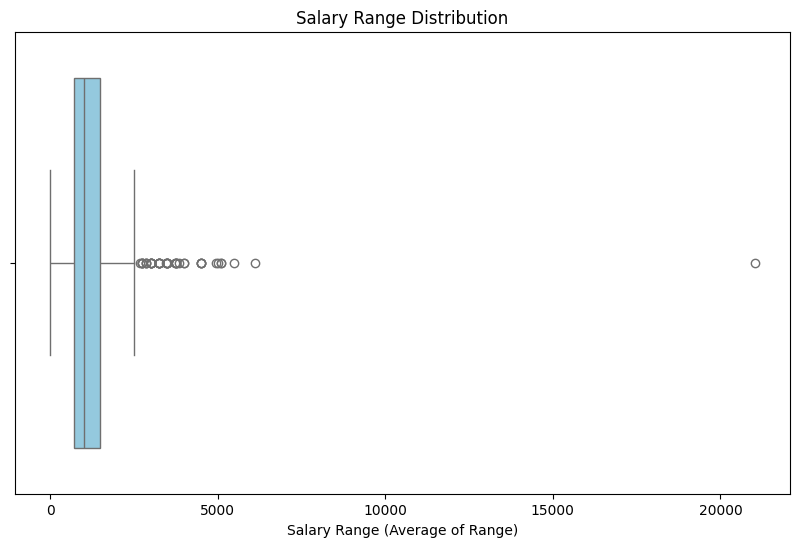

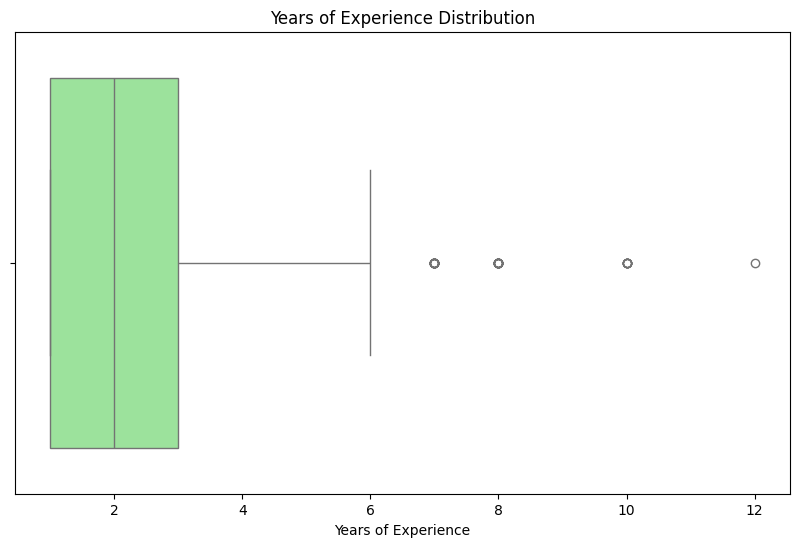

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the salary distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary Range'], color='skyblue')
plt.xlabel('Salary Range (Average of Range)')
plt.title('Salary Range Distribution')
plt.show()

# Visualize the experience distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Years of Experience'], color='lightgreen')
plt.xlabel('Years of Experience')
plt.title('Years of Experience Distribution')
plt.show()

In [154]:
# # Filter rows to exclude outliers in Salary Range
# df_cleaned = df[(df['Salary Range'] >= lower_bound_salary) & (df['Salary Range'] <= upper_bound_salary)]

# # Display the cleaned DataFrame
# print("Cleaned DataFrame without outliers in Salary Range:")
# print(df_cleaned)

# # Optionally, save the cleaned DataFrame to a new CSV file
# df_cleaned.to_csv('D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv', index=False)